In [8]:
pip install numpy pandas matplotlib scikit-learn seaborn xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\user\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [9]:
%store -r model_data
model_df = model_data
model_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,tenure_group_1-2yr,tenure_group_2-4yr,tenure_group_4-6yr,is_long_term,avg_monthly_charge,high_monthly_charge,contract_strength,service_count,has_internet,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,29.850000,0,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,1,0,1,55.573529,0,1,2,0,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,54.075000,0,0,2,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,1,0,1,40.905556,0,1,3,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,75.825000,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,0,1,...,1,0,0,1,82.937500,1,1,5,0,0
7039,0,72,103.20,7362.90,0,1,1,1,0,1,...,0,0,1,1,102.262500,1,1,4,1,0
7040,0,11,29.60,346.45,0,1,1,0,1,0,...,0,0,0,0,31.495455,0,0,1,0,0
7041,1,4,74.40,306.60,1,1,0,1,0,1,...,0,0,0,0,76.650000,1,0,0,1,1


In [10]:
X = model_df.drop(columns="Churn")
y = model_df["Churn"]

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import xgboost as xgb
print("Imported Necessary Utilities Succesfully.........")

Imported Necessary Utilities Succesfully.........


In [12]:
#Start by spliting dataset and using stratify=y to ensure churn/non-churn ratio is preserved in splits
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [13]:
#Now we should apply standard scaler to original numeriacal features keeping values on same scale most especially siince we would be using logistic regression
numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges", "avg_monthly_charge"]
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])
print("Standard Scaler Applied Successfully.........")

Standard Scaler Applied Successfully.........


In [16]:
#We are going to be training 3 models and evaluate them to get the best performed model namely logistic regression as baseline,random forest and then xgboost classifier
lr_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
print("Now Our Machines Are Ready To Learn")

Now Our Machines Are Ready To Learn


In [17]:
lr_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [18]:
rf_model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
xgb_model.fit(X_train, y_train)

C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:53:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [23]:
#Logistic Regression
y_pred_lr = lr_model.predict(X_test)
y_proba_lr = lr_model.predict_proba(X_test)[:, 1]
y_pred_lr
#y_proba_lr

array([0, 1, 0, ..., 0, 0, 0], shape=(1409,))

In [24]:
#Random Forest
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
y_pred_rf

array([0, 1, 0, ..., 0, 0, 0], shape=(1409,))

In [26]:
#XGBoost
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_pred_xgb

array([0, 1, 0, ..., 0, 0, 0], shape=(1409,))

# Looks like all our models are predicting samething but lets evaluate each of them to see

In [27]:
#For Logistic Regression
print(confusion_matrix(y_test , y_pred_lr))
print(classification_report(y_test , y_pred_lr))
print("ROC-AUC:" , roc_auc_score(y_test , y_proba_lr))

[[932 103]
 [182 192]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.51      0.57       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

ROC-AUC: 0.8422201555193882


In [28]:
#For Random Forest
print(confusion_matrix(y_test , y_pred_rf))
print(classification_report(y_test , y_pred_rf))
print("ROC-AUC:" , roc_auc_score(y_test , y_proba_rf))

[[928 107]
 [187 187]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

ROC-AUC: 0.8273114779508641


In [29]:
#For XGBoost
print(confusion_matrix(y_test , y_pred_xgb))
print(classification_report(y_test , y_pred_xgb))
print("ROC-AUC:" , roc_auc_score(y_test , y_pred_xgb))

[[932 103]
 [179 195]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

ROC-AUC: 0.7109367330594951


looking at the matrix for logistic regression it actually predicted 932 non churners correctly oit of 1035 non churners and 182 correct churners out of 374 with an Accuracy of 0.80 → 80% overall correct predictions
Recall for churn (class 1): 0.51 → model only catches ~51% of churners
Precision for churn: 0.65 → of those predicted churn, 65% are actually churners
ROC-AUC: 0.842 → overall discrimination is strong

Inference as LR is simple, gives a good ROC-AUC, but misses about half of actual churners

Comparing this with those of random forest and xgboost, random forest didnt improve significantly probably cos the data set is small 7k+ for XGBoost,in terms of raw classification, it performs slightly better at capturing churn (TP = 195 vs 192 of logistic regression), but overall discrimination metric is weaker.

So i would try using class_weight='balanced' in LR and scale_pos_weight in XGB and also SMOTE / oversampling to possibly improve the model and then do cross validation to determine the best set of hyperparameters

In [30]:
from sklearn.model_selection import RandomizedSearchCV

#for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

rf_random = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid_rf,
    n_iter=20,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rf_random.fit(X_train, y_train)

print("Best RF params:", rf_random.best_params_)
print("Best RF ROC-AUC:", rf_random.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best RF params: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10, 'class_weight': 'balanced'}
Best RF ROC-AUC: 0.8450043299362587


In [31]:
#fOR XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1],
    'colsample_bytree': [0.7, 0.8, 1],
    'scale_pos_weight': [X_train[y_train==0].shape[0]/X_train[y_train==1].shape[0]]
}

xgb_random = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid_xgb,
    n_iter=20,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

xgb_random.fit(X_train, y_train)

print("Best RF params:", xgb_random.best_params_)
print("Best RF ROC-AUC:", xgb_random.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [12:52:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best RF params: {'subsample': 0.8, 'scale_pos_weight': 2.768561872909699, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.7}
Best RF ROC-AUC: 0.8480897147827635


* Since Logistic Regression is relatively highest so no need to tune hyper parameters
* Making a grid search cross validation on both XGBoost and random forest we have been able to get the best hyper parameters and improvethe roc-auc score for both to approximately 0.85

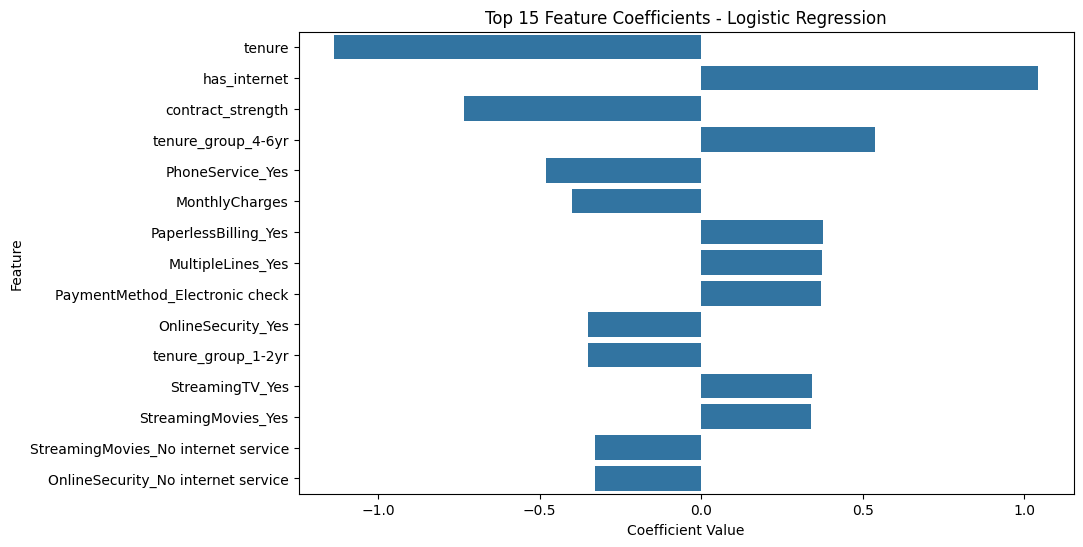

In [46]:
import seaborn as sns
#Logistic regression feature importance
lr_coeff = pd.Series(lr_model.coef_[0], index=X_train.columns)
lr_coeff = lr_coeff.sort_values(key=abs, ascending=False)  # sort by absolute impact

plt.figure(figsize=(10,6))
sns.barplot(x=lr_coeff[:15], y=lr_coeff.index[:15])
plt.title("Top 15 Feature Coefficients - Logistic Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

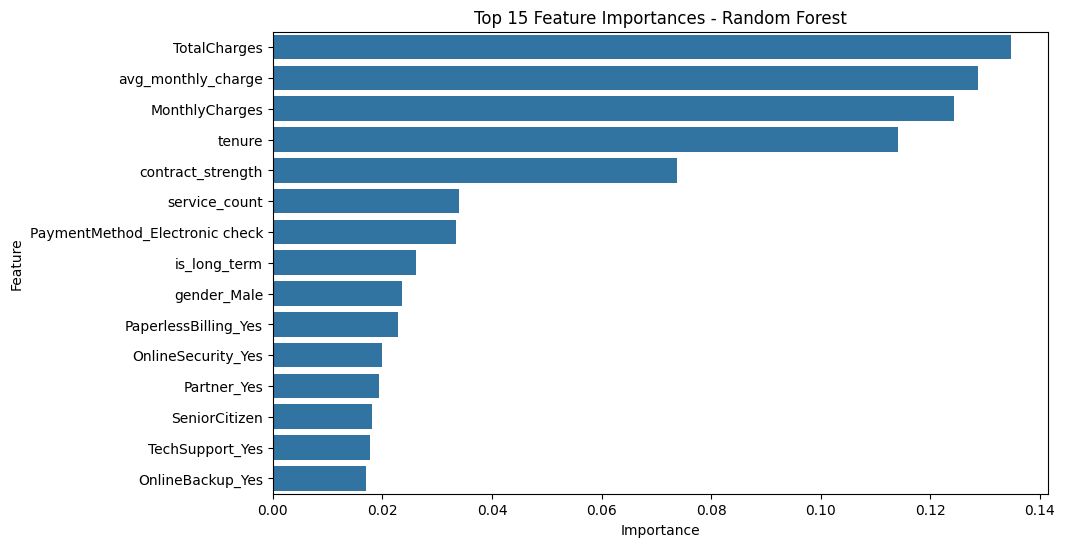

In [47]:
#Feature Importance for Random Forest
rf_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Sort  in descending order
rf_importances = rf_importances.sort_values(ascending=False)

# Plot top 15 features
plt.figure(figsize=(10,6))
sns.barplot(x=rf_importances[:15], y=rf_importances.index[:15])
plt.title("Top 15 Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

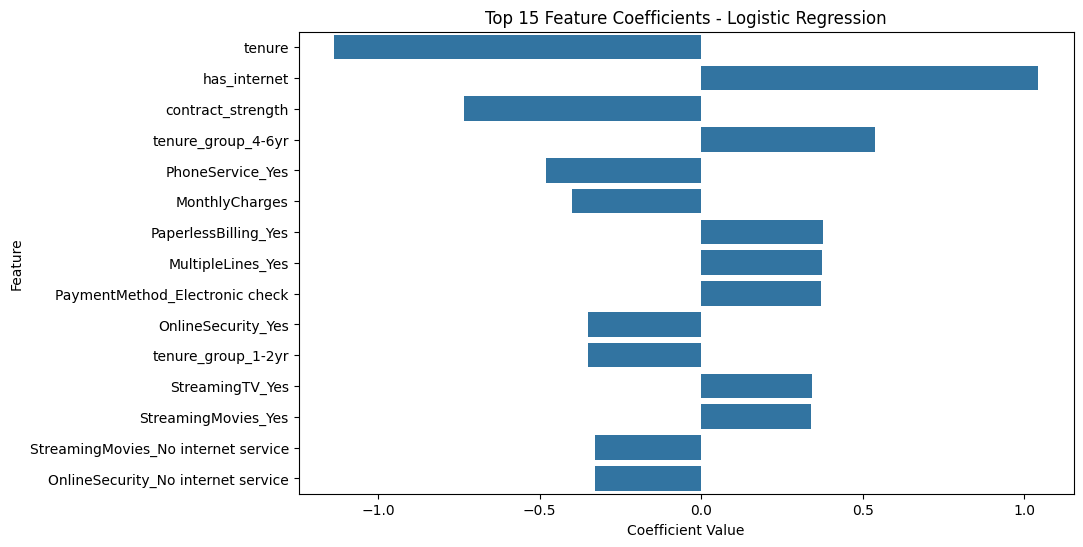

In [48]:
#Feature importance for XGBoost
lr_coeff = pd.Series(lr_model.coef_[0], index=X_train.columns)
lr_coeff = lr_coeff.sort_values(key=abs, ascending=False)  # sort by absolute impact

plt.figure(figsize=(10,6))
sns.barplot(x=lr_coeff[:15], y=lr_coeff.index[:15])
plt.title("Top 15 Feature Coefficients - Logistic Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()


# Its obvious from our feature importance plots that total charges ,average monthky charges,monthly charges ,tenure, contract stresngth , service count are top predictors and these are places where the company should re focus retention strategy